Q3: Is there a correlation based on symptoms vs preexisting conditions?

In [1]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/cleaned_data.csv')

In [4]:
column_names = ['Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 
                'Chronic kidney/renal disease', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)','Diarrhoea','Fatigue']
factors = pd.DataFrame(df, columns = column_names)
factors

,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Diarrhoea,Fatigue
0,0.30,0.19,0.08,0.03,0.02,0.02,0.94,0.29,0.79,0.00,0.05,0.23
1,0.48,0.31,0.24,0.07,0.00,0.04,0.94,0.63,0.72,0.00,0.04,0.28
2,0.23,0.14,0.01,0.01,0.07,0.00,0.94,0.16,0.82,0.00,0.05,0.21
3,0.00,0.12,0.00,0.00,0.03,0.00,0.92,0.19,0.00,0.00,0.02,0.00
4,0.00,0.10,0.00,0.00,0.05,0.00,0.90,0.22,0.00,0.00,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0.38,0.21,0.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00,0.03,0.00
1152,0.50,0.26,0.11,0.07,0.03,0.08,0.74,0.00,0.77,0.54,0.20,0.00
1153,0.59,0.38,0.14,0.07,0.08,0.16,0.73,0.00,0.73,0.61,0.25,0.00
1154,0.68,0.43,0.13,0.06,0.06,0.12,0.73,0.00,0.72,0.74,0.21,0.00


In [5]:
factors.corr()

,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Diarrhoea,Fatigue
Hypertension,1.000000,0.293388,0.273774,0.201661,0.267184,0.164724,0.093750,-0.026175,0.067040,0.323263,-0.046802,0.230167
Diabetes,0.293388,1.000000,0.305186,0.560300,0.138164,0.363383,-0.071648,0.080528,-0.033767,0.242567,-0.136130,0.079022
Cardiovascular Disease (incl. CAD),0.273774,0.305186,1.000000,0.392851,0.069660,0.274974,0.017694,0.146493,-0.148418,0.100967,-0.023153,-0.096567
Chronic obstructive lung (COPD),0.201661,0.560300,0.392851,1.000000,0.098774,0.535319,-0.163521,-0.019136,-0.108156,0.300069,-0.134789,0.007097
Cancer (Any),0.267184,0.138164,0.069660,0.098774,1.000000,0.036400,0.075728,-0.048253,0.058609,0.172405,-0.016334,0.138304
Chronic kidney/renal disease,0.164724,0.363383,0.274974,0.535319,0.036400,1.000000,0.017160,0.008746,0.027325,0.242109,-0.090868,-0.063672
Fever (temperature ≥37·3°C),0.093750,-0.071648,0.017694,-0.163521,0.075728,0.017160,1.000000,0.023800,0.427877,0.057821,0.163087,0.355991
Respiratory rate > 24 breaths per min,-0.026175,0.080528,0.146493,-0.019136,-0.048253,0.008746,0.023800,1.000000,-0.013228,0.021111,0.050779,-0.034498
Cough,0.067040,-0.033767,-0.148418,-0.108156,0.058609,0.027325,0.427877,-0.013228,1.000000,0.259037,0.385735,0.355461
Shortness of Breath (dyspnoea),0.323263,0.242567,0.100967,0.300069,0.172405,0.242109,0.057821,0.021111,0.259037,1.000000,0.033276,0.035443


In [6]:
corr = factors.corr()

<AxesSubplot:>

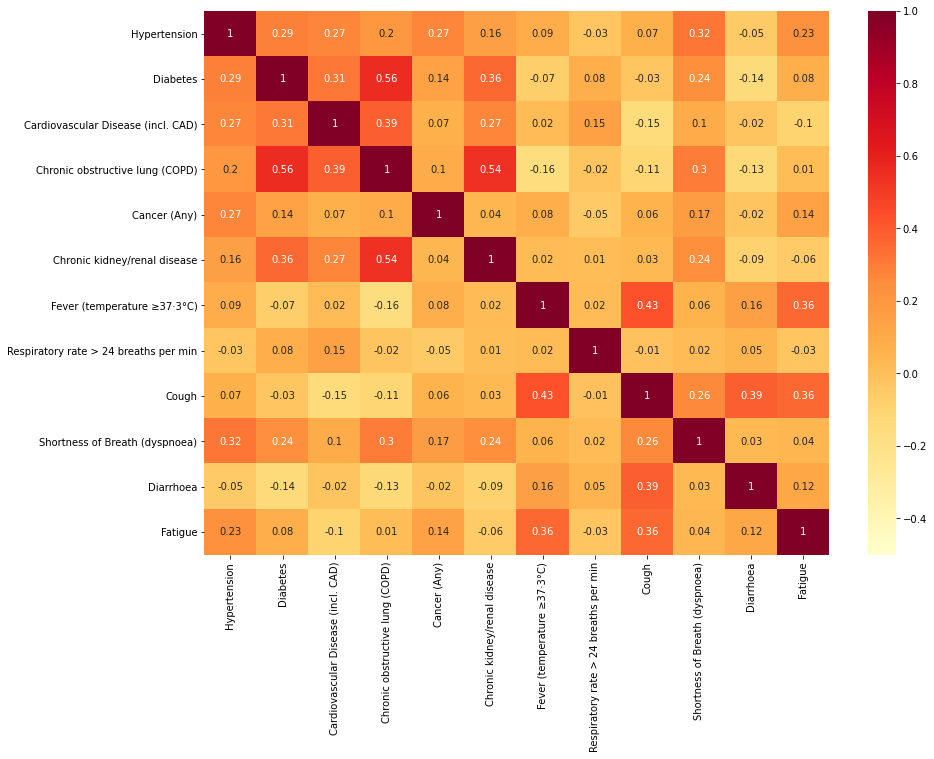

In [7]:
fig, ax = plt.subplots(figsize=(14,10)) 

corr=corr.round(2)
sns.heatmap(corr, annot=True, vmin=-0.5, cmap="YlOrRd")
# fig.title()

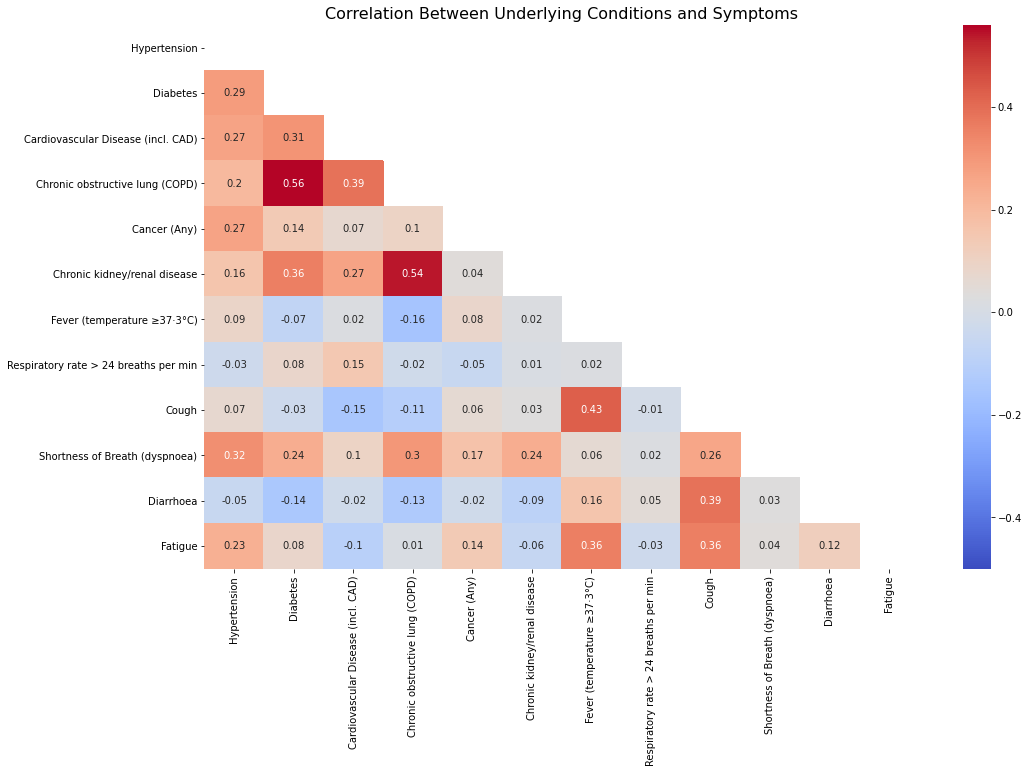

In [8]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(factors.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, annot=True, vmin=-0.5, cmap="coolwarm")
heatmap.set_title('Correlation Between Underlying Conditions and Symptoms',fontdict={'fontsize':16})
plt.savefig('../static/pltImages/correlationMatrix.png')